9.11.2020

# Using NumPy, matplotlib and SciPy
## Tutorial 1, Exercise 1: Image manipulation

The goal of this exercise is for you to become familiar with the important
packages NumPy (for n-dimensional array manipulations) and matplotlib (for
MATLAB-like plotting and visualization).
Your task is to load a provided image into a NumPy array and do some basic
manipulations.

You need to replace the ``???`` in the code with the required commands.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import scipy.interpolate as inter

In [4]:
plt.ion()

Use ``plt.imread`` to read in ``'tree.jpg'`` as numpy array, select
only the red channel. Check the image dimensions with img.shape.
``img_red`` should contain a 2-dimensional array.
Please note that this is actually a gray scale image and all three
image channels are the same.

In [5]:
img = plt.imread('tree.jpg')

In [6]:
img_red = img[:, :, 0]

Show ``img_red`` with ``plt.imshow``:

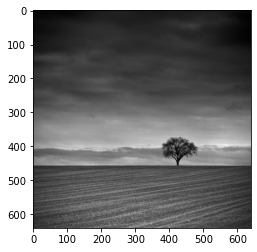

In [7]:
plt.figure(1)
plt.imshow(img_red, cmap='gray')

Using ``plt.imread``, the image values returns unsigned integers between 0 and 255.
**Add a colorbar** to verify the range of values:

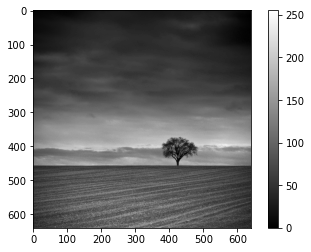

In [8]:
plt.figure(1)
plt.imshow(img_red, cmap='gray')
plt.colorbar()

Create a new NumPy array that is the subarray containing **only the tree** in
the image. Then **invert** the intensity values of the small subimage and call
the resulting array ``img_crop_inv``.

**Use slicing** to select the tree (get the coordinates by looking at the image)!

In [9]:
img_crop = img_red[350:500, 350:500].copy()

Invert the image by subtracting from its maximum. You can find the maximum of ``img`` by
calling ``img.max()`` or ``np.max(img)``.

In [10]:
img_crop_inv = img_crop.max() - img_crop

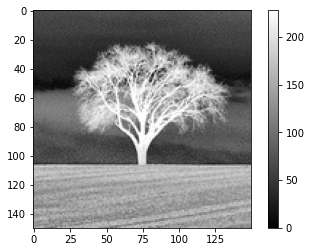

In [11]:
plt.figure(2)
plt.imshow(img_crop_inv, cmap='gray')
plt.colorbar()

**Apply a threshold to** ``img_crop`` (or ``img_crop_inv``) to make a binary image separating the tree from its background!

Define a threshold. You can check whether your threshold is appropriate by looking at the image colorbar!

In [12]:
threshold = 190

Thresholding is possible by a simple ``<`` or ``>`` sign and the threshold value. You do not have to explicitly loop over the image, the greater-than or less-than comparison is **performed for all pixels at once**, yielding a new array with the same size as the input array! 

In [13]:
img_binary = img_crop_inv > threshold

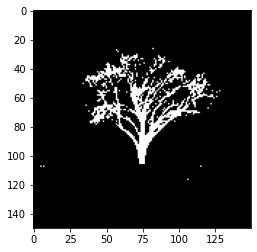

In [14]:
plt.figure(3)
plt.imshow(img_binary, cmap='gray')

Plot a vertical profile line through the tree of ``img_red``
**Select a column of the image via slicing.** Your result ``line_tree`` should be a
1D array of the shape ``(640,)``.

In [15]:
line_tree = img_red[:, 430]

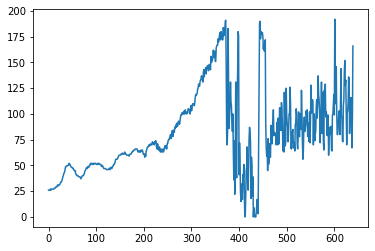

In [19]:
plt.figure(4)
plt.plot(line_tree)


Generate a $400 \times 400$ matrix ``img_seg`` that consists only of zeros:

In [15]:
img_seg = np.zeros((400, 400))
cs = img_crop.shape
ss = img_seg.shape

Place the subarray containing just the tree (``img_crop``) in the center of ``img_seg``:

In [16]:
img_seg[ss[0] // 2 - cs[0] // 2 : ss[0] // 2 + cs[0] // 2,
        ss[1] // 2 - cs[1] // 2 : ss[1] // 2 + cs[1] // 2] = img_crop

Have a look at img_seg with ``plt.imshow``:

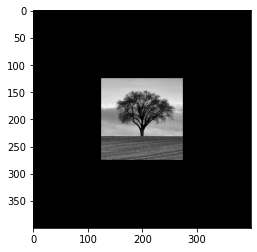

In [17]:
plt.figure(5)
plt.imshow(img_seg, cmap='gray')

Use the function ``scipy.ndimage.rotate`` (here called ``nd.rotate`` because of the way we named our imports) to **rotate ``img_seg`` by 45 degrees**.
Use ``nd.rotate?`` to see the function definition in IPython / IPython notebook or
``help(nd.rotate)`` in the Python interpreter -- or do the same from Spyder.

In [18]:
angle_rot = 45.
img_rot = nd.rotate(img_seg, angle_rot, reshape=False)

Check that the shape of ``img_rot`` is the same as for img_seg, if not look at
the additional paramters of the ``nd.rotate`` function.

(400, 400)


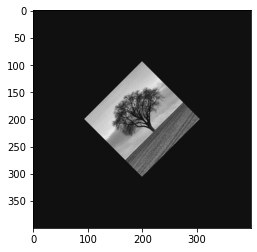

In [19]:
plt.figure(6)
plt.imshow(img_rot, cmap='gray')

print(img_rot.shape)